In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
from sklearn.metrics import f1_score

In [2]:
import sys
sys.path.append(".../files")
import utils

1) Crea un pipeline llamado model que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (LogisticRegression(penalty="none"))

2) Realiza un Bagging Classifer de model llamado bagging_logreg con n_estimators=100 y random_state=314

3) Entrena model y bagging_logreg considerando X y y definido arriba

4) Grafica la función de decisión dada por model y por bagging_logreg ¿Qué observas?

5) Considerando un f1_score (dentro de sklearn.metrics), calcula el f1-score sobre el test set (X_test, y_test) considerando model y bagging_logreg. ¿Qué resultados arroja?

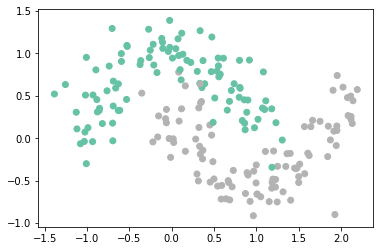

In [3]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [4]:
model = Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("regre_lin", LogisticRegression( solver="lbfgs",penalty = 'none')) #penalty = 'none', 
])

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
# bagging_logreg con n_estimators=100 y random_state=314
bagging_logreg=BaggingClassifier(model,n_estimators=100,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)

In [8]:
#3) Entrena model y bagging_logreg considerando X y y definido arriba
model.fit(X,y)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('regre_lin',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [9]:
bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('regre_lin',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                        

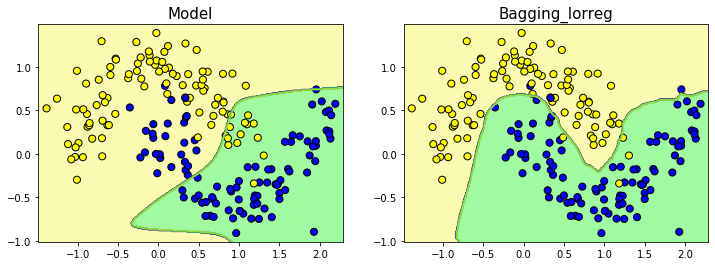

In [10]:
#Grafica la función de decisión dada por model y por bagging_logreg ¿Qué observas?
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("Model", fontsize=15)
ax[1].set_title("Bagging_lorreg", fontsize=15)
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

#En denitiva, el modelo bag tiene un mejor ajuste de clasificación que el realizado por el modelo logístico por si solo

In [11]:
#5) Considerando un f1_score (dentro de sklearn.metrics), calcula el f1-score sobre el test set (X_test, y_test) 
#considerando model y bagging_logreg. ¿Qué resultados arroja?

y_hat_m = model.predict(X_test)
y_hat_blr = bagging_logreg.predict(X_test)
print(f'F1 model = {f1_score(y_test, y_hat_m)}')
print(f'F1 bagging_logreg = {f1_score(y_test, y_hat_blr)}')

F1 model = 0.7567567567567567
F1 bagging_logreg = 0.9500000000000001
